In [1]:
import numpy as np
import scanpy as sc
import scprep
import matplotlib.pyplot as plt
import phate

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [3]:
adata.obs.columns

Index(['n_counts', 'batch', 'day', 'new', 'sample_id', 'growth', 'log_growth',
       'sample_labels', 'louvain', 'S_score', 'G2M_score', 'phase',
       'emt_scores'],
      dtype='object')

In [4]:
adata.obsm

AxisArrays with keys: X_pca, X_phate

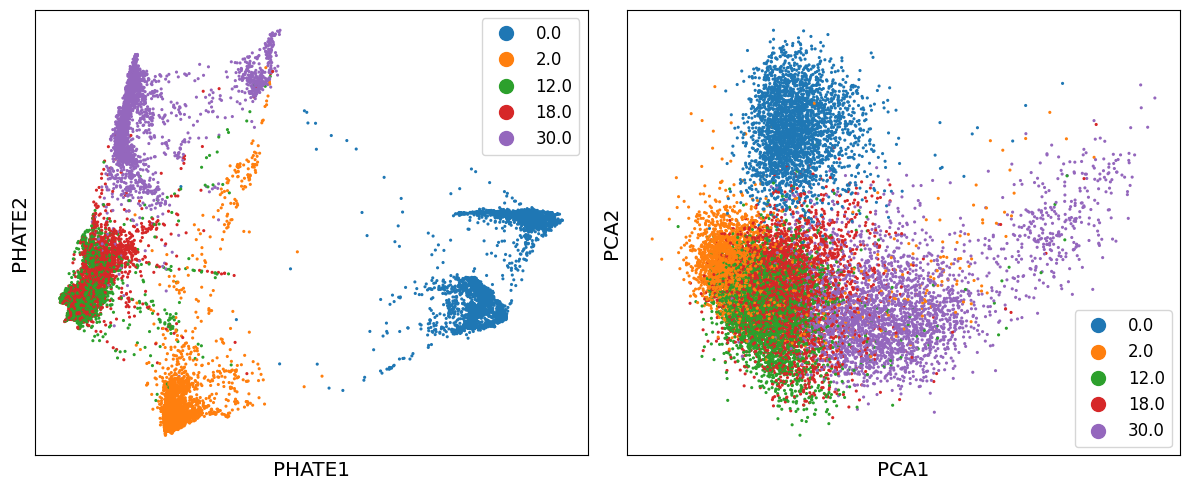

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['day'], ticks=False, label_prefix='PHATE', ax=ax1)
scprep.plot.scatter2d(adata.obsm['X_pca'], c=adata.obs['day'], ticks=False, label_prefix='PCA', ax=ax2)

plt.tight_layout()
plt.show()

<Axes: xlabel='PHATE1', ylabel='PHATE2'>

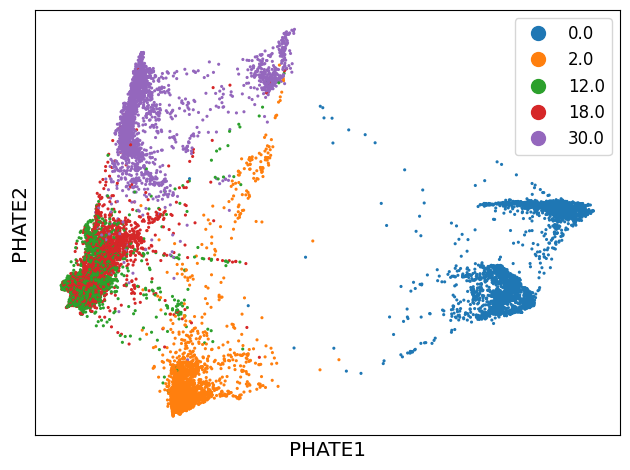

In [7]:
scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['day'], ticks=False, label_prefix='PHATE')


In [6]:
adata.shape

(16985, 21465)

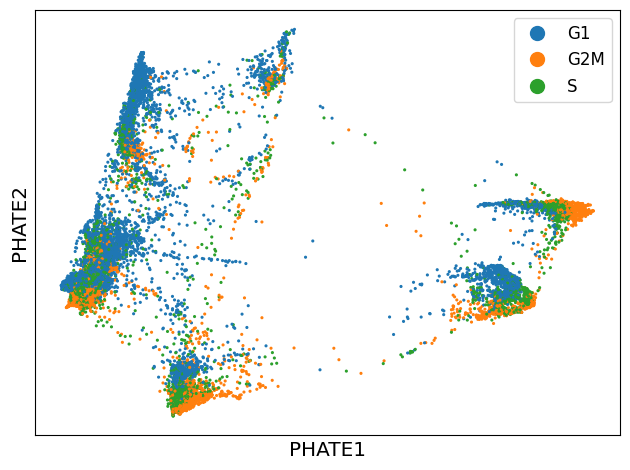

In [7]:
scprep.plot.scatter2d(adata.obsm['X_phate'], c=adata.obs['phase'], ticks=False, label_prefix='PHATE');

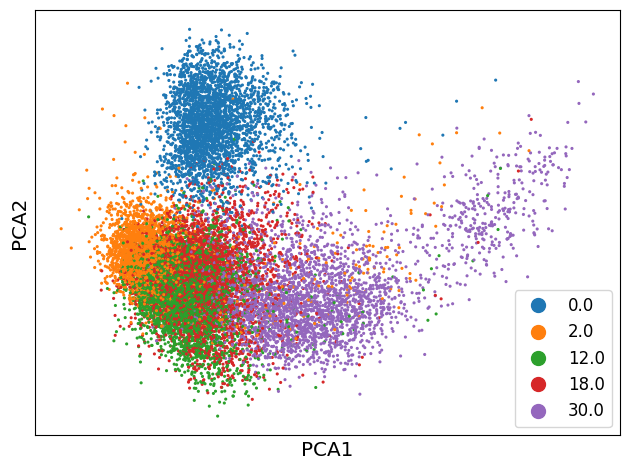

In [8]:
X_pca = adata.obsm['X_pca']
sc.pp.pca(adata)
scprep.plot.scatter2d(adata.obsm['X_pca'], c=adata.obs['day'], ticks=False, label_prefix='PCA');


In [9]:
np.abs(adata.obsm['X_pca'] - X_pca).max()

0.0013611317

In [10]:
phate_op = phate.PHATE(n_jobs=-1)
X_phate = phate_op.fit_transform(adata.X)

Calculating PHATE...
  Running PHATE on 16985 observations and 21465 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 30.27 seconds.
    Calculating KNN search...
    Calculated KNN search in 17.14 seconds.
    Calculating affinities...
    Calculated affinities in 0.27 seconds.
  Calculated graph and diffusion operator in 47.70 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.20 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.94 seconds.
  Calculated landmark operator in 4.14 seconds.
  Calculating optimal t...
    Automatically selected t = 22
  Calculated optimal t in 1.12 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.26 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.03 seconds.
Calculated PHATE in 57.26 seconds.


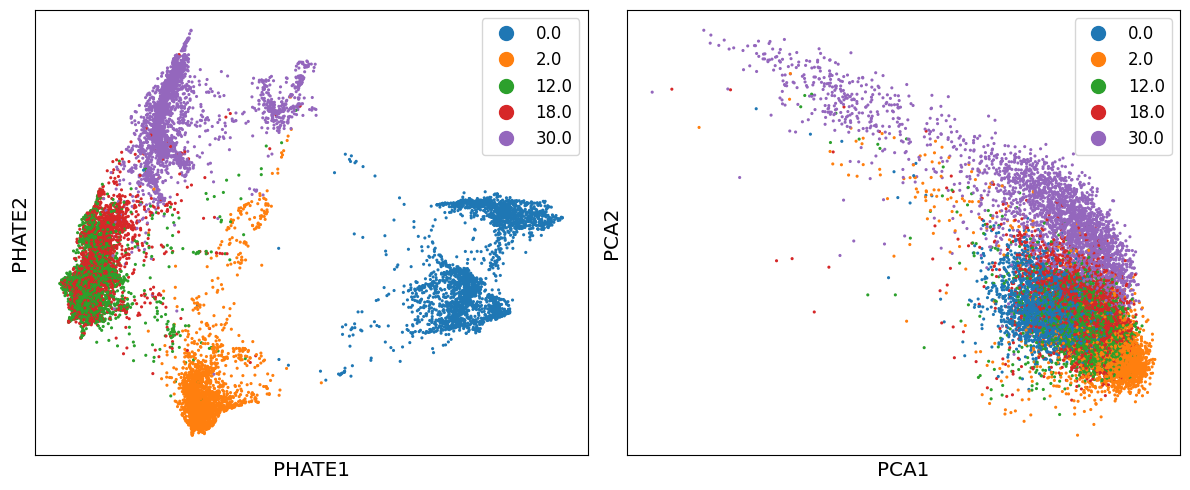

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

scprep.plot.scatter2d(X_phate, c=adata.obs['day'], ticks=False, label_prefix='PHATE', ax=ax1)
scprep.plot.scatter2d(phate_op.graph.data_nu, c=adata.obs['day'], ticks=False, label_prefix='PCA', ax=ax2)

plt.tight_layout()
plt.show()

In [14]:
adata.varm['PCs'].shape

(21465, 50)

In [15]:
adata.obsm['X_pca'].shape

(16985, 50)

In [29]:
rec_dat = (adata.obsm['X_pca'] @ adata.varm['PCs'].T) + adata.X.toarray().mean(axis=0)

In [40]:
np.abs(rec_dat - adata.X).mean()

0.15480444952376296

In [34]:
rec_dat_phate = phate_op.graph.data_pca.inverse_transform(phate_op.graph.data_nu)

In [39]:
np.abs(rec_dat_phate - adata.X).mean()

0.15271266

In [38]:
np.abs(rec_dat_phate - rec_dat).mean()

0.022584642222967896

In [41]:
adata.obsm['X_phate'].shape

(16985, 2)